In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from keras.utils.np_utils import to_categorical 

In [2]:
# loading training dataset in train_data dataframe
train_data=pd.read_csv('../hand_written character recognition/mnist_train.csv')
# loading testing dataset in test_data dataframe
test_data=pd.read_csv('../hand_written character recognition/mnist_test.csv')

In [3]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train=train_data.drop('label',1)
# reshaping X_train
X_train=X_train.values.reshape(-1,28,28,1)
# normalizing X_train
X_train=tf.keras.utils.normalize(X_train,axis=1)

C:\Users\Anurag\AppData\Local\Temp\ipykernel_13700\3507674394.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train=train_data.drop('label',1)


In [5]:
y_train=train_data['label']
y_train = to_categorical(y_train, num_classes = 10)

In [6]:
model=Sequential()
model.add(Conv2D(64, (3, 3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
test_data=tf.keras.utils.normalize(test_data,axis=1)

model.add(Flatten())
model.add(Dense(256,activation=tf.nn.relu))
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,batch_size=1000)

Epoch 1/10
60/60 [==============================] - 39s 637ms/step - loss: 0.8280 - accuracy: 0.7694
Epoch 2/10
60/60 [==============================] - 36s 605ms/step - loss: 0.1894 - accuracy: 0.9423
Epoch 3/10
60/60 [==============================] - 36s 599ms/step - loss: 0.1173 - accuracy: 0.9642
Epoch 4/10
60/60 [==============================] - 35s 581ms/step - loss: 0.0904 - accuracy: 0.9724
Epoch 5/10
60/60 [==============================] - 35s 584ms/step - loss: 0.0705 - accuracy: 0.9788
Epoch 6/10
60/60 [==============================] - 36s 604ms/step - loss: 0.0564 - accuracy: 0.9835
Epoch 7/10
60/60 [==============================] - 36s 605ms/step - loss: 0.0479 - accuracy: 0.9853
Epoch 8/10
60/60 [==============================] - 36s 600ms/step - loss: 0.0420 - accuracy: 0.9873
Epoch 9/10
60/60 [==============================] - 35s 586ms/step - loss: 0.0375 - accuracy: 0.9882
Epoch 10/10
60/60 [==============================] - 36s 593ms/step - loss: 0.0337 - accura

In [8]:
model.save('final_model.h5')

In [9]:
test_data=test_data.drop('label',1)
test_data=test_data.values.reshape(-1,28,28,1)

C:\Users\Anurag\AppData\Local\Temp\ipykernel_13700\856917808.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_data=test_data.drop('label',1)


313/313 [==============================] - 3s 8ms/step
The predicted number is  9


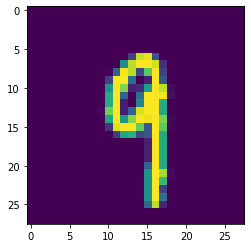

In [10]:
prediction=model.predict(test_data)
prediction=np.argmax(prediction,axis=1)
plt.imshow(test_data[521].reshape(28,28))
print('The predicted number is  '+str(prediction[521]))

313/313 [==============================] - 3s 9ms/step
The predicted number is  7


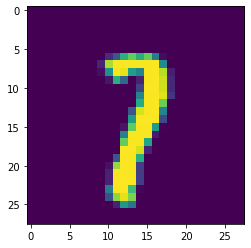

In [11]:
from keras.models import load_model
saved_model = load_model('final_model.h5')
prediction=saved_model.predict(test_data)
prediction=np.argmax(prediction,axis=1)
plt.imshow(test_data[111].reshape(28,28))
print('The predicted number is  '+str(prediction[111]))
# pickled_model.predict(test_data)

In [15]:
from keras.models import load_model
from tkinter import *
from PIL import ImageGrab
import imageio.v2 as imageio
import tkinter.font as font


class Paint(object):
    def __init__(self):
        self.root=Tk()
        self.root.title('Playing with numbers')
        # self.root.wm_iconbitmap('44143.ico')
        self.root.configure(background='light salmon')
        self.c=Canvas(self.root,bg='light cyan',height=330,width=400)
        self.label=Label(self.root,text='Draw any numer',font=20,bg='light salmon')
        self.label.grid(row=0,column=3)
        self.c.grid(row=1,columnspan=9)
        self.c.create_line(0,0,400,0,width=20,fill='midnight blue')
        self.c.create_line(0,0,0,330,width=20,fill='midnight blue')
        self.c.create_line(400,0,400,330,width=20,fill='midnight blue')
        self.c.create_line(0,330,400,330,width=20,fill='midnight blue')
        self.myfont=font.Font(size=20,weight='bold')
        self.predicting_button=Button(self.root,text='Predict',fg='maroon',bg='steel blue',height=2,width=6,font=self.myfont,command=lambda:self.classify(self.c))
        self.predicting_button.grid(row=2,column=1)
        self.clear=Button(self.root,text='Clear',fg='blue',bg='red',height=2,width=6,font=self.myfont,command=self.clear)
        self.clear.grid(row=2,column=5)
        self.prediction_text = Text(self.root, height=5, width=5)
        self.prediction_text.grid(row=4, column=3)
        self.label=Label(self.root,text="Predicted Number is",fg="black",font=30,bg='light salmon')
        
        self.label.grid(row=3,column=3)
        self.model=model
        self.setup()
        self.root.mainloop()
    def setup(self):
        self.old_x=None
        self.old_y=None
        self.color='black'
        self.linewidth=15
        self.c.bind('<B1-Motion>', self.paint)
        self.c.bind('<ButtonRelease-1>', self.reset)
    def paint(self,event):
        paint_color=self.color
        if self.old_x and self.old_y:
            self.c.create_line(self.old_x,self.old_y,event.x,event.y,fill=paint_color,width=self.linewidth,capstyle=ROUND,
                              smooth=TRUE,splinesteps=48)
        self.old_x=event.x
        self.old_y=event.y
    def clear(self):
        """Clear drawing area"""
        self.c.delete("all")

    def reset(self, event):
        """reset old_x and old_y if the left mouse button is released"""
        self.old_x, self.old_y = None, None    
    def classify(self,widget):
        x=self.root.winfo_rootx()+widget.winfo_x()
        y=self.root.winfo_rooty()+widget.winfo_y()
        x1=widget.winfo_width()
        y1=widget.winfo_height()
        ImageGrab.grab().crop((x,y,x1,y1)).resize((28,28)).save('classify.png')
        img=imageio.imread('classify.png',as_gray=False,pilmode='P')
        img=np.array(img)
        img=np.reshape(img,(-1,28,28,1))
        img[img==0] = 255
        img[img==225] = 0
        # Predict digit
        # pred = self.model.predict([img])
        # # Get index with highest probability
        # pred = np.argmax(pred)
        saved_model = load_model('final_model.h5')
        pred = saved_model.predict([img])
        pred = np.argmax(pred)
        print(pred)
        self.prediction_text.delete("1.0", END)
        self.prediction_text.insert(END, pred)
        labelfont = ('times', 30, 'bold')
        self.prediction_text.config(font=labelfont)
        
if __name__ == '__main__':
    Paint()

1/1 [==============================] - 0s 141ms/step
8


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Anurag\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\Anurag\AppData\Local\Temp\ipykernel_13700\135441474.py", line 23, in <lambda>
    self.predicting_button=Button(self.root,text='Predict',fg='maroon',bg='steel blue',height=2,width=6,font=self.myfont,command=lambda:self.classify(self.c))
  File "C:\Users\Anurag\AppData\Local\Temp\ipykernel_13700\135441474.py", line 61, in classify
    ImageGrab.grab().crop((x,y,x1,y1)).resize((28,28)).save('classify.png')
  File "c:\Users\Anurag\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py", line 1171, in crop
    raise ValueError("Coordinate 'right' is less than 'left'")
ValueError: Coordinate 'right' is less than 'left'
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Anurag\AppData\Local\Programs\Python\Python310\lib\tkinte